In [2197]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install -U statsmodels
#!pip install xgboost
#!pip install yellowbrick

In [2198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2199]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import yellowbrick.model_selection as ms

## 1. Datos: Precipitaciones, Indicadores Económicos Banco Central

In [2200]:
%ls -l

total 5136
-rw-r--r--  1 itsupport  staff     1302 Jul 27 23:39 README.md
-rw-r--r--  1 itsupport  staff  2225366 Aug  1 23:38 Spike.ipynb
-rw-r--r--@ 1 itsupport  staff    83205 Jul 27 23:39 Spike_Challenge_precios.pdf
-rw-r--r--  1 itsupport  staff   206349 Jul 27 23:39 banco_central.csv
-rw-r--r--@ 1 itsupport  staff      600 Aug  1 01:15 bc_nueva_descarga.csv
-rw-r--r--@ 1 itsupport  staff    11137 Aug  1 01:11 bc_nueva_descarga.xlsx
-rw-r--r--  1 itsupport  staff     8281 Jul 27 23:39 precio_leche.csv
-rw-r--r--  1 itsupport  staff    72742 Jul 27 23:39 precipitaciones.csv


In [2201]:
lluvia = pd.read_csv("precipitaciones.csv")
central = pd.read_csv("banco_central.csv")

## 2. Análisis de datos. Creación de variables

### 2.1 Datos Precipitaciones

In [2202]:
lluvia.shape

(496, 9)

In [2203]:
lluvia

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235
...,...,...,...,...,...,...,...,...,...
491,1988-10-01,0.000000,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.000000,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419


In [2204]:
lluvia.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [2205]:
lluvia.sort_values(by="date", inplace=True);

### 2.1.1 Precipitaciones: Distribución

Las distribuciones de todas las variabes son sesgadas hacia la derecha (i.e la media es mayor a la mediana) donde 
**"Coquimbo"** es la región con mayor diferencia entre media y mediana (la media es casi 4 veces la mediana).


In [2206]:
np.divide(lluvia.mean(), lluvia.median())

<ipython-input-2206-ac164aeab110>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.divide(lluvia.mean(), lluvia.median())
<ipython-input-2206-ac164aeab110>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.divide(lluvia.mean(), lluvia.median())


Coquimbo                               3.968202
Valparaiso                             3.590574
Metropolitana_de_Santiago              2.602040
Libertador_Gral__Bernardo_O_Higgins    2.779270
Maule                                  2.161293
Biobio                                 1.610303
La_Araucania                           1.370038
Los_Rios                               1.250733
dtype: float64

In [2207]:
lluvia.set_index("date", inplace=True)

In [2208]:
#creo un dataset "largo" para visualizar boxplots contiguos con seaborn
long = lluvia.unstack().reset_index()

In [2209]:
long.head(2)

,level_0,date,0
0,Coquimbo,1979-01-01,2.641948
1,Coquimbo,1979-02-01,1.179804


El gráfico de boxplots muestra como las **regiones del sur(*) tienen lluvias más frecuentes** (la mediana aumenta en las regiones del sur) y una mayor variabilidad.

*Mapa chile: https://espanol.mapsofworld.com/continentes/sur-america/chile

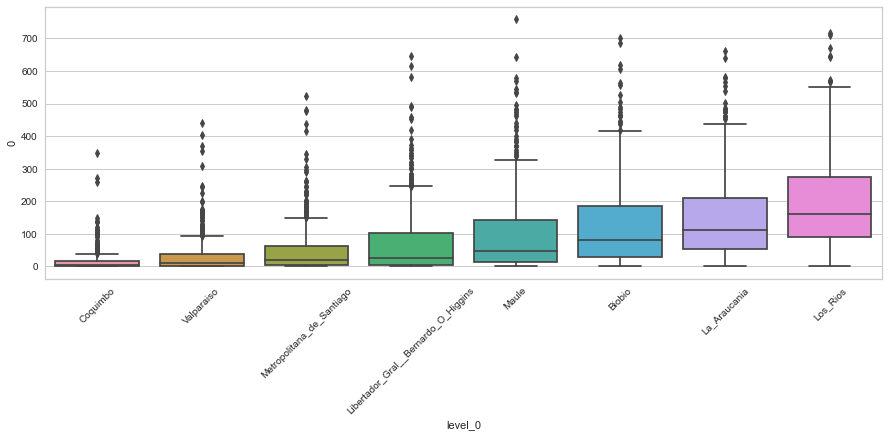

In [2210]:
fig, ax = plt.subplots(figsize=(15,5));
sns.boxplot(x="level_0", y=0, data=long, ax=ax);
plt.xticks(rotation=45);

### 2.1.2 Precipitaciones: Valores nulos

In [2211]:
#No hay valores nulos en el dataset
lluvia.isna().sum()

Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

### 2.1.3 Precipitaciones: Series de tiempo duplicadas

In [2212]:
def check_ts_dup(ts):
    """checks if there are duplicated time series
        ts: Numpy array of time series
    """
    dups = ts.duplicated().sum()
    if dups:
        print("{} fechas duplicadas.".format(dups))
        return True
    else:
        print("No hay fechas duplicadas.")
        return False

In [2213]:
check_ts_dup(lluvia.index)

No hay fechas duplicadas.


False

In [2214]:
lluvia.index = pd.to_datetime(lluvia.index)

In [2215]:
#El día está defaulteado al primero
lluvia.index.day.value_counts()

1    496
Name: date, dtype: int64

In [2216]:
#Los meses parecen estar bien
lluvia.index.month.value_counts()

1     42
2     42
3     42
4     42
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    41
Name: date, dtype: int64

In [2217]:
#Los años también parecen estar bien, y solo contamos con 4 meses de 2020
lluvia.index.year.value_counts()

1979    12
2010    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2011    12
1980    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2001    12
2000    12
1999    12
1998    12
1981    12
1982    12
1983    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
2020     4
Name: date, dtype: int64

### 2.2 Datos Banco Central

In [2218]:
central.shape

(614, 85)

In [2219]:
central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01 00:00:00 UTC,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01 00:00:00 UTC,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01 00:00:00 UTC,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01 00:00:00 UTC,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


Los valores de los indicadores económicos fueron reconocidos como "strings" debido a que llevan un "." como separador de miles. Esta variable deberá ser tratada.

In [2220]:
central.sort_values(by="Periodo", inplace=True);

In [2221]:
central.set_index("Periodo", inplace=True)

### 2.2.1 Banco Central: Distribución

Para analizar las distribuciones, voy a reemplazar el "." de las strings y convertirlas a numeric.

Los órdenes de magnitud no parecen estar bien (si saco los puntos la mayoría están en órdenes de 10^8) pero voy a trabajar asumiendo que el error se trasladó a todas las variables de igual manera, por lo que la relación entre las mismas no debería estar afectada.

In [2222]:
central = central.iloc[:,:].replace("\.","", regex=True)#borro los "."

In [2223]:
def parse_to_number(x):
    """convirte variables de tipo string a numeric
        x: named numpy array or named pandas series.
        Si la conversión falla, el nombre de la variable que falló en convertir junto con el error.
    """
    try:
        return pd.to_numeric(x) #
    except Exception as e:
        print(x.name + " error: ",e)
        return x

In [2224]:
central = central.apply(parse_to_number)

Imacec_industria error:  Unable to parse string "a" at position 30
PIB_Agropecuario_silvicola error:  Unable to parse string "a" at position 57
PIB_Industria_Manufacturera error:  Unable to parse string "a" at position 28
PIB_Quimica error:  Unable to parse string "a" at position 16
PIB_Minerales_no_metalicos_y_metalica_basica error:  Unable to parse string "a" at position 481
Ocupacion_en_Suministro_de_electricidad_INE error:  Unable to parse string "a" at position 25
Ocupacion_en_Informacion_y_comunicaciones_INE error:  Unable to parse string "a" at position 10
Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE error:  Unable to parse string "a" at position 473
Ocupacion_en_Otras_actividades_de_servicios_INE error:  Unable to parse string "a" at position 499


Un total de 9 variables contienen la letra "a". Voy a por por NaN.

In [2225]:
#verifico un caso
central[30:31]["Imacec_industria"]

Periodo
1972-07-01 00:00:00 UTC    a
Name: Imacec_industria, dtype: object

In [2226]:
#guardo el nombre de las columnas cuya conversión falló
failed_cols = central.select_dtypes(include='object').columns

In [2227]:
central[failed_cols] = central[failed_cols].replace(r"a", np.NaN)

In [2228]:
#uso el caso anterior para validar con la conversión funcionó
central[30:31]["Imacec_industria"]

Periodo
1972-07-01 00:00:00 UTC    NaN
Name: Imacec_industria, dtype: object

Convierto las variables restantes a numeric

In [2229]:
central[failed_cols] = central[failed_cols].apply(parse_to_number)

In [2230]:
print("Columnas que aun son strings: ", len(central.select_dtypes(include='object').columns))

Columnas que aun son strings:  0


Procedo a analizar la distribución de las mismas

In [2231]:
#si la media es menor que la mediana en una proporción mayor a 5%, diremos que la distribución está
#sesgada hacia la izquierda

l_prop = np.divide(central.mean(), central.median()) 
left_skew = l_prop < .95
l_cols = central.columns[left_skew]
print("Variables con sesgo hacia la izquierda:")
display(pd.DataFrame({"mean/median":l_prop[left_skew],
                     "mean": central[l_cols].mean(),
                     "median":central[l_cols].median()}))
print("*****************************")

#si la media es mas mayor que la mediana en una proporción mayor a 5%, diremos que la distribución está
#sesgada hacia la derecha
r_prop = np.divide(central.mean(), central.median()) 
right_skew = r_prop > 1.05
r_cols = central.columns[right_skew]
print("Variables con sesgo hacia la derecha:")
display(pd.DataFrame({"mean/median":r_prop[right_skew],
                     "mean": central[r_cols].mean(),
                     "median":central[r_cols].median()}))
print("*****************************")

#  Si la diferencia de proporción entre mediana y media están entre +-5%, diremos que la distribución es
# aproximadamente normal
aprox_normal = ~left_skew & ~right_skew
normal_prop = np.divide(central.mean(), central.median()) 
normal_cols = central.columns[aprox_normal]
print("Variables con distribución aproximadamente normal: \n")
display(pd.DataFrame({"mean/median":normal_prop[aprox_normal],
                     "mean": central[normal_cols].mean(),
                     "median":central[normal_cols].median()}))

Variables con sesgo hacia la izquierda:


,mean/median,mean,median
Imacec_empalmado,0.893369,5.046252e+08,564856633.0
Imacec_produccion_de_bienes,0.814166,6.126781e+08,752522065.0
Imacec_minero,0.745603,6.427296e+08,862026828.0
Imacec_industria,0.829822,6.118681e+08,737348742.0
Imacec_resto_de_bienes,0.880213,5.586226e+08,634644439.0
Imacec_servicios,0.921234,4.415409e+08,479292836.5
Imacec_a_costo_de_factores,0.865310,4.946213e+08,571611712.0
Imacec_no_minero,0.919715,4.803953e+08,522330392.5
PIB_Pesca,0.932797,5.213687e+08,558930237.0
PIB_Mineria,0.914906,1.161399e+08,126941868.0


*****************************
Variables con sesgo hacia la derecha:


,mean/median,mean,median
PIB_Agropecuario_silvicola,1.165090,3.118088e+08,2.676265e+08
PIB_Mineria_del_cobre,1.151674,1.327157e+08,1.152372e+08
PIB_Celulosa,3.781968,4.014136e+08,1.061388e+08
PIB_Refinacion_de_petroleo,3.474556,3.965357e+08,1.141256e+08
PIB_Comercio,1.866716,2.085780e+08,1.117353e+08
PIB_Servicios_personales,1.637571,2.496762e+08,1.524674e+08
PIB_a_costo_de_factores,1.106860,1.215784e+08,1.098408e+08
Precio_de_la_gasolina_en_EEUU_dolaresm3,704.636729,1.596355e+07,2.265500e+04
Precio_de_la_onza_troy_de_oro_dolaresoz,1.502978,5.787066e+02,3.850400e+02
Precio_de_la_onza_troy_de_plata_dolaresoz,8.914823,5.420212e+01,6.080000e+00


*****************************
Variables con distribución aproximadamente normal: 



,mean/median,mean,median
Imacec_comercio,1.035779,4.607443e+08,4.448286e+08
PIB_Otras_actividades_mineras,1.028446,1.350559e+08,1.313203e+08
Precio_del_kerosene_dolaresm3,1.022793,3.613135e+07,3.532618e+07
Precio_del_propano_centavos_de_dolargalon_DTN,1.005518,8.852882e+01,8.804300e+01
Ocupacion_en_Agricultura_INE,0.962557,6.319188e+08,6.565004e+08
Ocupacion_en_Explotacion_de_minas_y_canteras_INE,0.952268,2.099885e+08,2.205140e+08
Ocupacion_en_Suministro_de_electricidad_INE,0.969562,4.216394e+08,4.348760e+08
Ocupacion_en_Informacion_y_comunicaciones_INE,0.969274,1.570442e+08,1.620225e+08
Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,1.026753,1.846978e+08,1.798853e+08
Ventas_autos_nuevos,0.956366,2.669408e+04,2.791200e+04


### 2.1.2 Banco Central: Valores nulos

Como los datos del banco central continenen 85 variables, comenzaremos analizando los valores nulos para entender si podemos reducir la dimensionalidad enfocandonos en las variables con bajo porcentaje de valores nulos.

Variables con un gran volumnen de valores nulos agregan ruido al modelo.

In [2232]:
nulos = central.isna().sum() / central.shape[0]

In [2233]:
print("Al graficar la distribución de valores nulos de cada variable, vemos que que el {}% de las variables tienen más de un 20% de valores nulos".format(sum(nulos >=.2)))

Al graficar la distribución de valores nulos de cada variable, vemos que que el 80% de las variables tienen más de un 20% de valores nulos


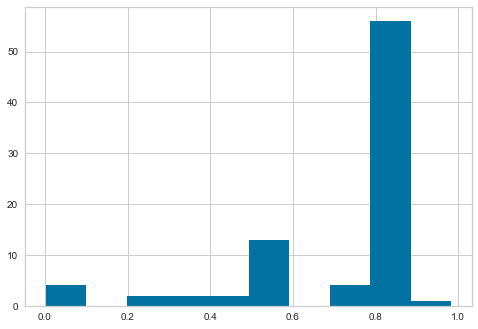

In [2234]:
#Distribución de valores nulos
plt.hist(nulos);

A modo exploratorio, voy a investigar las variables que contienen menos de 20% de valores nulos

In [2235]:
index = nulos <.2#mascara boolean con las variables que tienen menos del 20% de valores nulos
cols = central.columns[index]#me quedo con los nombres de dichas columnas
central_s = central[cols] # creo el dataset "central_s" que solo contiene las variables que tienen <20% de valores nulos

Al mirar con mas detenimiento las variables, los órdenes de magnitud de las mismas parecen sospechosos (i.e que el precio del metro cúbico de gasolina en EEUU haya costado ~3 millones de USD en Agosto 2020 no tiene sentido).

In [2236]:
central_s.tail()

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra
Periodo,,,,
2020-08-01 00:00:00 UTC,3180968.0,1969.78,270.033,294688379.0
2020-09-01 00:00:00 UTC,30850634.0,1923.35,257.916,30447292.0
2020-10-01 00:00:00 UTC,30028972.0,1900.36,241.857,304035653.0
2020-11-01 00:00:00 UTC,29756846.0,1866.35,240.693,320395083.0
2020-13-01 00:00:00 UTC,NaN,NaN,NaN,NaN


Se procedió a extraer el reporte de variables estadísticas del Banco Central de chile (https://si3.bcentral.cl/siete/ES/Siete/Canasta?idCanasta=FHLES3325). El mismo fue descargado con el nombre "bc_nueva_descarga.csv"

Vamos a comprar los valores de los meses de Agosto y Septiembre del 2020 del dataset original versus los valores recientemente descargados

In [2237]:
old = central_s.iloc[609:611,:]
new= pd.read_csv("bc_nueva_descarga.csv")
new.set_index("Periodo",inplace=True)

In [2238]:
new.head(2)

,Precio de la gasolina en EE.UU. (dólares/m3),Precio de la onza troy de oro (dólares/oz),Precio de la onza troy de plata (dólares/oz),Precio del cobre refinado BML (dólares/libra)
Periodo,,,,
Aug.2020,318.10,1'969.78,27.00,2.95
Sep.2020,308.51,1'923.35,25.79,3.04


In [2239]:
new["Precio de la onza troy de oro (dólares/oz)"] = new["Precio de la onza troy de oro (dólares/oz)"].replace("'","", regex=True)#reemplazo la apostrofe

In [2240]:
new.head(2)

,Precio de la gasolina en EE.UU. (dólares/m3),Precio de la onza troy de oro (dólares/oz),Precio de la onza troy de plata (dólares/oz),Precio del cobre refinado BML (dólares/libra)
Periodo,,,,
Aug.2020,318.10,1969.78,27.00,2.95
Sep.2020,308.51,1923.35,25.79,3.04


In [2241]:
#convierto todas las variables a numericas
new = new.apply(pd.to_numeric) 

En el nuevo dataset descargado desde el "Banco Central de Chile", observamos los siguientes órdenes de magnitud:

* "...gasolina..": 10^2
* "...onza..oro..": 10^3
* "...onza..plata..": 10^1
* "...BML..": 10^0

In [2242]:
new.iloc[:2].T

Periodo,Aug.2020,Sep.2020
Precio de la gasolina en EE.UU. (dólares/m3),318.10,308.51
Precio de la onza troy de oro (dólares/oz),1969.78,1923.35
Precio de la onza troy de plata (dólares/oz),27.00,25.79
Precio del cobre refinado BML (dólares/libra),2.95,3.04


En el dataset original vemos inconsistencia en los órdenes de magnitud de las variables "Precio..gasolina..", y "Precio...BML.."

In [2243]:
old.T

Periodo,2020-08-01 00:00:00 UTC,2020-09-01 00:00:00 UTC
Precio_de_la_gasolina_en_EEUU_dolaresm3,3.180968e+06,3.085063e+07
Precio_de_la_onza_troy_de_oro_dolaresoz,1.969780e+03,1.923350e+03
Precio_de_la_onza_troy_de_plata_dolaresoz,2.700330e+02,2.579160e+02
Precio_del_cobre_refinado_BML_dolareslibra,2.946884e+08,3.044729e+07


Sabemos que los datos proporcionados del banco central contienen mucho ruido y los valores y ordenes de magnitud en muchos casos no son los correctos.

Esto pondrí en peligro el análysis y en un caso real se procedería a investigar la causa raiz del error.

Sin embargo, debido al poco tiempo que se espera dediquemos al ejercicio, no procederemos a explorar en mayor profundidad el origen de estos errores.

In [2244]:
c_final.tail()

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz
date,,
2020-07-31,318.09,1969.78
2020-08-31,308.50,1923.35
2020-09-30,300.28,1900.36
2020-10-31,297.56,1866.35
2020-11-30,NaN,NaN


**Nota1**: vemos también que la fecha (Periodo) está en UTC y parece haber valores de fecha erroneos (e.g 2020-13-01)

### 2.1.3 Banco Central: Series de tiempo duplicadas y valores incorrectos

In [2245]:
check_ts_dup(central.index)

2 fechas duplicadas.


True

In [2246]:
central.index

Index(['1970-01-01 00:00:00 UTC', '1970-02-01 00:00:00 UTC',
       '1970-03-01 00:00:00 UTC', '1970-04-01 00:00:00 UTC',
       '1970-05-01 00:00:00 UTC', '1970-06-01 00:00:00 UTC',
       '1970-07-01 00:00:00 UTC', '1970-08-01 00:00:00 UTC',
       '1970-09-01 00:00:00 UTC', '1970-10-01 00:00:00 UTC',
       ...
       '2020-03-01 00:00:00 UTC', '2020-04-01 00:00:00 UTC',
       '2020-05-01 00:00:00 UTC', '2020-06-01 00:00:00 UTC',
       '2020-07-01 00:00:00 UTC', '2020-08-01 00:00:00 UTC',
       '2020-09-01 00:00:00 UTC', '2020-10-01 00:00:00 UTC',
       '2020-11-01 00:00:00 UTC', '2020-13-01 00:00:00 UTC'],
      dtype='object', name='Periodo', length=614)

In [2247]:
central.reset_index(inplace=True)

In [2248]:
# El día parece estar defaulteado también para el primero de cada mes
central["Periodo"].apply(lambda x: x.split("-")[2]).value_counts()

01 00:00:00 UTC    614
Name: Periodo, dtype: int64

In [2249]:
#El mes 8 parece estar duplicado, y el mes 13, es probable que sea el mes 12 y sea producto de un "typo"
central["Periodo"].apply(lambda x: x.split("-")[1]).value_counts()

08    53
01    51
02    51
03    51
04    51
05    51
06    51
07    51
09    51
10    51
11    51
12    50
13     1
Name: Periodo, dtype: int64

In [2250]:
#Reemplazamos 13 por 12 en el mes
central["Periodo"] = central["Periodo"].replace("-13-", "-12-", regex=True)

In [2251]:
#en los casos en los que hay duplicados, me quedo con el que aparece primero
central = central[~central["Periodo"].duplicated()]

In [2252]:
central["Periodo"].apply(lambda x: x.split("-")[1]).value_counts()

01    51
02    51
03    51
04    51
05    51
06    51
07    51
08    51
09    51
10    51
11    51
12    51
Name: Periodo, dtype: int64

In [2253]:
check_ts_dup(central.index)

No hay fechas duplicadas.


False

Como el tiempo de estos datos está en UTC a las 12AM, le tendría que restar  4 horas para llevarlo al huso horario de Chile: https://www.datosmundial.com/zonas-horarias/clt-chile-time.php

Creo que lo relevante de esto, es que el PIB en realidad corresponde al del mes anterior (mes vencido).
Con más contexto podría tomar una decisión mas informada, pero con el contexto actual, voy a optar por restarle un mes a a las fechas porque entiendo que los datos del PIB de Febrero a las 00:00:00 en UTC, en realidad corresponden al PIB de Chile en Enero.

In [2254]:
#creo la variable datetime para el set de datos del banco dentral
chile_time = (pd.to_datetime(central.Periodo, format="%Y-%m-%d %H:%M:%S %Z") + pd.Timedelta(days=-1)).dt.strftime('%Y-%m-')

In [2255]:
chile_time+"01"

0      1969-12-01
1      1970-01-01
2      1970-02-01
3      1970-03-01
4      1970-04-01
          ...    
609    2020-07-01
610    2020-08-01
611    2020-09-01
612    2020-10-01
613    2020-11-01
Name: Periodo, Length: 612, dtype: object

In [2256]:
#creo la variable "date"
central.loc[:,["date"]] = pd.to_datetime(chile_time+"01")

In [2257]:
#dropeo la variable Periodo
central.drop("Periodo", axis = 1, inplace=True)

In [2258]:
#mando "date" como índice
central.set_index("date", inplace=True)

In [2259]:
central.head()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
date,,,,,,,,,,,,,,,,,,,,,
1969-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 Visualización

### 3.1 Crea una función que permita graficar series históricas de precipitaciones para un rango de fechas

In [2260]:
def rain_viz(rain_df, start_date=None, end_date=None, region="Coquimbo"):
    """
        grafica series históricas de precipitaciones
        @args:
            rain_df: dataframe en formato matriz con la regiones en columnas y mm de precipitaciones como índice
            en formato serie de tiempo.
            start_date: fecha de inicio de la serie en formato YYYY-mm-dd
            end_date: fecha de fin de la serie en formato YYYY-mm-dd
            region: región del dataset.
            
    """
    ## falta:
    ## asegúrate de verificar en tu función que tanto el nombre de la región como las fechas ingresadas 
    ## existan en el dataset
    exit_cond = 0
    if start_date not in rain_df.index:
        print("La fecha de inicio ingresada '{}' no se encuentra la serie de tiempo.".format(start_date))
        exit_cond+=1
    
    if end_date not in rain_df.index:
        print("La fecha de fin ingresada '{}' no se encuentra la serie de tiempo.".format(end_date))
        exit_cond+=1
        
    if region not in rain_df.columns:
        print("No existe la región {} en el dataset ingresado.".format(region))
        exit_cond+=1
        
    if exit_cond >0:
        return None
        
    elif start_date== None or end_date == None:
        rain_df[region].plot(figsize = (15,5), label = region);
    else:
        rain_df.loc[start_date:end_date, region].plot(figsize = (15,5));
    plt.legend();
    plt.title("Luvia en 'mm' durante el período {} a {}".format(start_date, end_date));

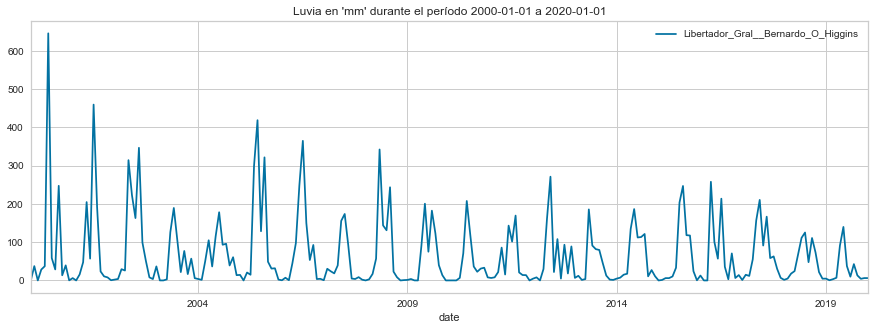

In [2261]:
rain_viz(lluvia, start_date= "2000-01-01", end_date="2020-01-01",region="Libertador_Gral__Bernardo_O_Higgins" )

Captura de errores

In [2262]:
#Test error: start_date
rain_viz(lluvia, start_date= "2200-01-01", end_date="2020-01-01",region="Coquimbo" )

#Test error: start_date
rain_viz(lluvia, start_date= "2000-01-01", end_date="2220-01-01",region="Coquimbo" )

#Test error: start_date
rain_viz(lluvia, start_date= "2000-01-01", end_date="2020-01-01",region="coco" )

#Test error: all
rain_viz(lluvia, start_date= "2200-01-01", end_date="2220-01-01",region="coco" )

La fecha de inicio ingresada '2200-01-01' no se encuentra la serie de tiempo.
La fecha de fin ingresada '2220-01-01' no se encuentra la serie de tiempo.
No existe la región coco en el dataset ingresado.
La fecha de inicio ingresada '2200-01-01' no se encuentra la serie de tiempo.
La fecha de fin ingresada '2220-01-01' no se encuentra la serie de tiempo.
No existe la región coco en el dataset ingresado.


### 3.2 Crea una función que, para una región, grafique múltiples series de tiempo mensuales de precipitaciones, donde cada serie de tiempo corresponda a un año

In [2263]:
def multi_ts_viz(rain_df, years, region):
    """grafica multiples series históricas de precipitaciones
        @args:
            rain_df: dataframe en formato matriz con la regiones en columnas y mm de precipitaciones como índice
            en formato serie de tiempo y con nombre 'date'
            years: lista con años que se desea graficar
            region: región que se desea graficar"""
    temp = rain_df[[region]]
    temp.reset_index(inplace=True)
    plt.figure(figsize=(15,5))
    for year in years:
        x= temp.loc[temp["date"].dt.year == year, "date"].dt.strftime('%b')
        y= temp.loc[temp["date"].dt.year == year, region].values
        plt.plot(x,y, label=str(year))
    plt.legend()
    plt.xlabel("Meses")
    plt.ylabel("Lluvia en mm")
    plt.title("Luvia en 'mm' para la región {}".format(region))

En las series de tiempo de la región "Maule" pueden observarse los siguientes patrones:

* Los picos de precipitaciones se dan en los meses de Mayo/Juno (con la excepción del año 2002 donde el pico fué en Agosto)
* El volumen de precipitaciones parece estar disminuyendo con el pasar de los años

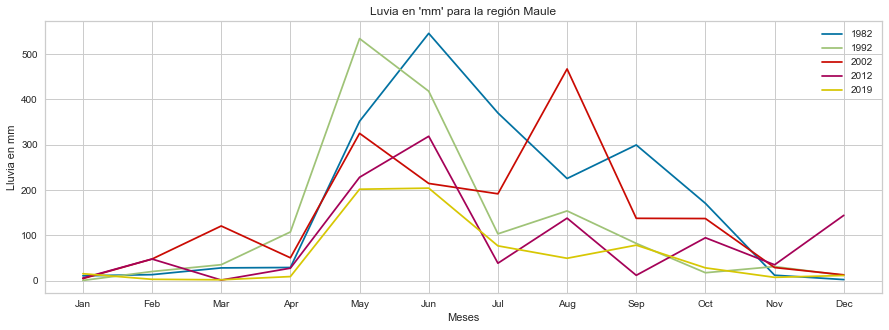

In [2264]:
multi_ts_viz(lluvia, [1982, 1992, 2002, 2012, 2019], "Maule")

### 3.3 Crea una función que permita visualizar dos series históricas de PIB para un rango de fechas determinado. 

In [2265]:
def pib_viz(pib_df, start_date, end_date, 
            pib1="PIB_Agropecuario_silvicola",
            pib2 = "PIB_Servicios_financieros"):
    """
        grafica series históricas de precipitaciones
        @args:
            rain_df: dataframe en formato matriz con la regiones en columnas y mm de precipitaciones como índice
            en formato serie de tiempo.
            start_date: fecha de inicio de la serie en formato YYYY-mm-dd
            end_date: fecha de fin de la serie en formato YYYY-mm-dd
            region: región del dataset.
            
    """
    plt.figure(figsize= (15,5));
    x1 = pib_df.loc[start_date:end_date].index;
    y1 = pib_df.loc[start_date:end_date][pib1];
    plt.plot(x1, y1, label=pib1);
    
    x2 = pib_df.loc[start_date:end_date].index;
    y2 = pib_df.loc[start_date:end_date][pib2];
    plt.plot(x2, y2, label=pib2);
    
    plt.legend();
    plt.title("Luvia en 'mm' durante el período {} a {}".format(start_date, end_date));

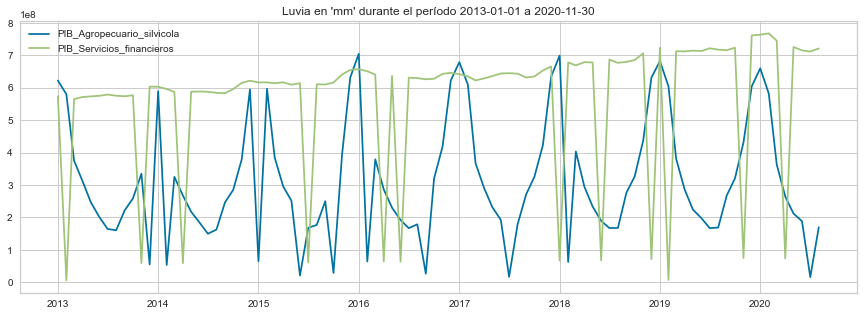

In [2266]:
pib_viz(central, start_date = '2013-01-01', end_date='2020-11-30')

No logro ver relación alguna entre el PIB Agropecuario y el de Servicios Financieros.

 * PIB Agropecuario silvícola: La serie tiene estacionalidad, presentando máximo al inicio de cada año, con valle ponunciados alrededor de la mitad de cada año calendario
 * PIB de Servicios financieros: no logro ver estacionalidad. Los máximos parecen crecer con el pasar de los años.
 

## 4 Tratamiento y creación de variables

### 4.1 ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?

Si las series se mueven de manera lineal entre sí (en el mismo sentido o en el opuesto), entonces podemos usar el coeficiente de correlación de pearson.

Para entrenar un modelo, lo ideal es que las variables independientes posean una correlación cercana a 1 o -1 con respecto de la variable de respuesta/dependiente.

Las variables independientes, deberían tener una correlación cercana a 0 entre sí para evitar efectos de colinearidad.
En otras palabras, si hay variables independientes con alta correlación entre sí, tengo datos redundantes (i.e La altura de una persona, y el talle de su calzado).

### 4.2 Importo "precio_leche" 

In [2267]:
leche = pd.read_csv("precio_leche.csv")

In [2268]:
leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [2269]:
#creo un diccionario para cambiar los valores de los meses
month_dict = {}
month_num = 1
for mes in leche.Mes.unique():
    month_dict[mes]=month_num
    month_num+=1

In [2270]:
fechas = leche.Anio.astype(str)+"-"+leche.Mes.map(month_dict).astype(str)+"-"+"01"

In [2271]:
fechas

0       1979-1-01
1       1979-2-01
2       1979-3-01
3       1979-4-01
4       1979-5-01
          ...    
501    2020-10-01
502    2020-11-01
503    2020-12-01
504     2021-1-01
505     2021-2-01
Length: 506, dtype: object

In [2272]:
leche["date"] = pd.to_datetime(fechas, format="%Y-%m-%d")

In [2273]:
leche.dtypes

Anio                     int64
Mes                     object
Precio_leche           float64
date            datetime64[ns]
dtype: object

In [2274]:
leche.set_index("date", inplace=True)

In [2275]:
leche.drop(["Anio", "Mes"], axis=1, inplace=True)

In [2276]:
print("Fechas duplicadas en el data set de precios de leche: {}".format(leche.index.duplicated().sum()))

Fechas duplicadas en el data set de precios de leche: 0


### 4.3 Hago el merge con precipitaciones y datos del banco central

### 4.3.1 Precio Leche vs Precipitaciones

In [2277]:
leche_precip = leche.merge(lluvia, how ="inner", left_index=True, right_index=True)

In [2278]:
leche_precip.index.min()

Timestamp('1979-01-01 00:00:00')

In [2279]:
leche_precip.index.max()

Timestamp('2020-04-01 00:00:00')

In [2280]:
leche_precip.isna().sum()

Precio_leche                           0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

Al graficar los coeficientes de correlación entre el precio de la leche y precipitaciones, vemos que no no parecen estar correlacionadas.

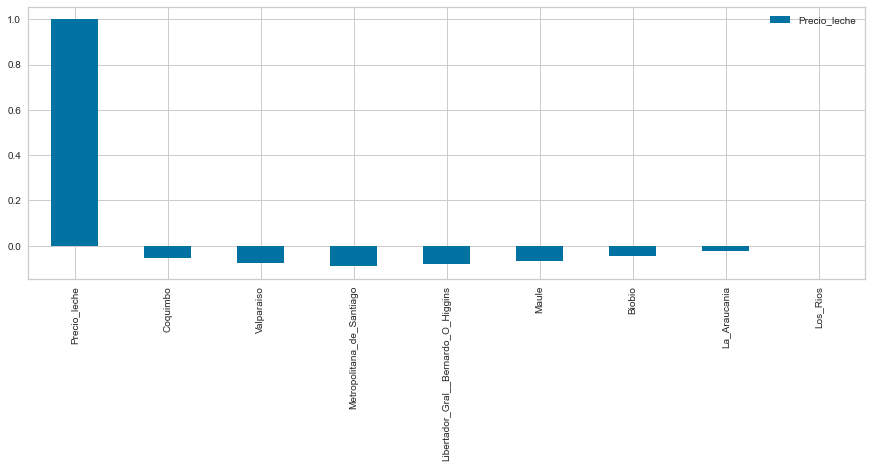

In [2281]:
leche_precip.corr().iloc[:1,:].T.plot(kind="bar", figsize=(15,5));

In [2282]:
leche_precip.shape

(496, 9)

Sin embargo, vemos como las variables de precipitaciones, si están relacionadas linealmente entre sí.
De hecho, las variables contiguas parecen tener una fuerte relación lineal que se disipa al entre regiones mas lejanas.

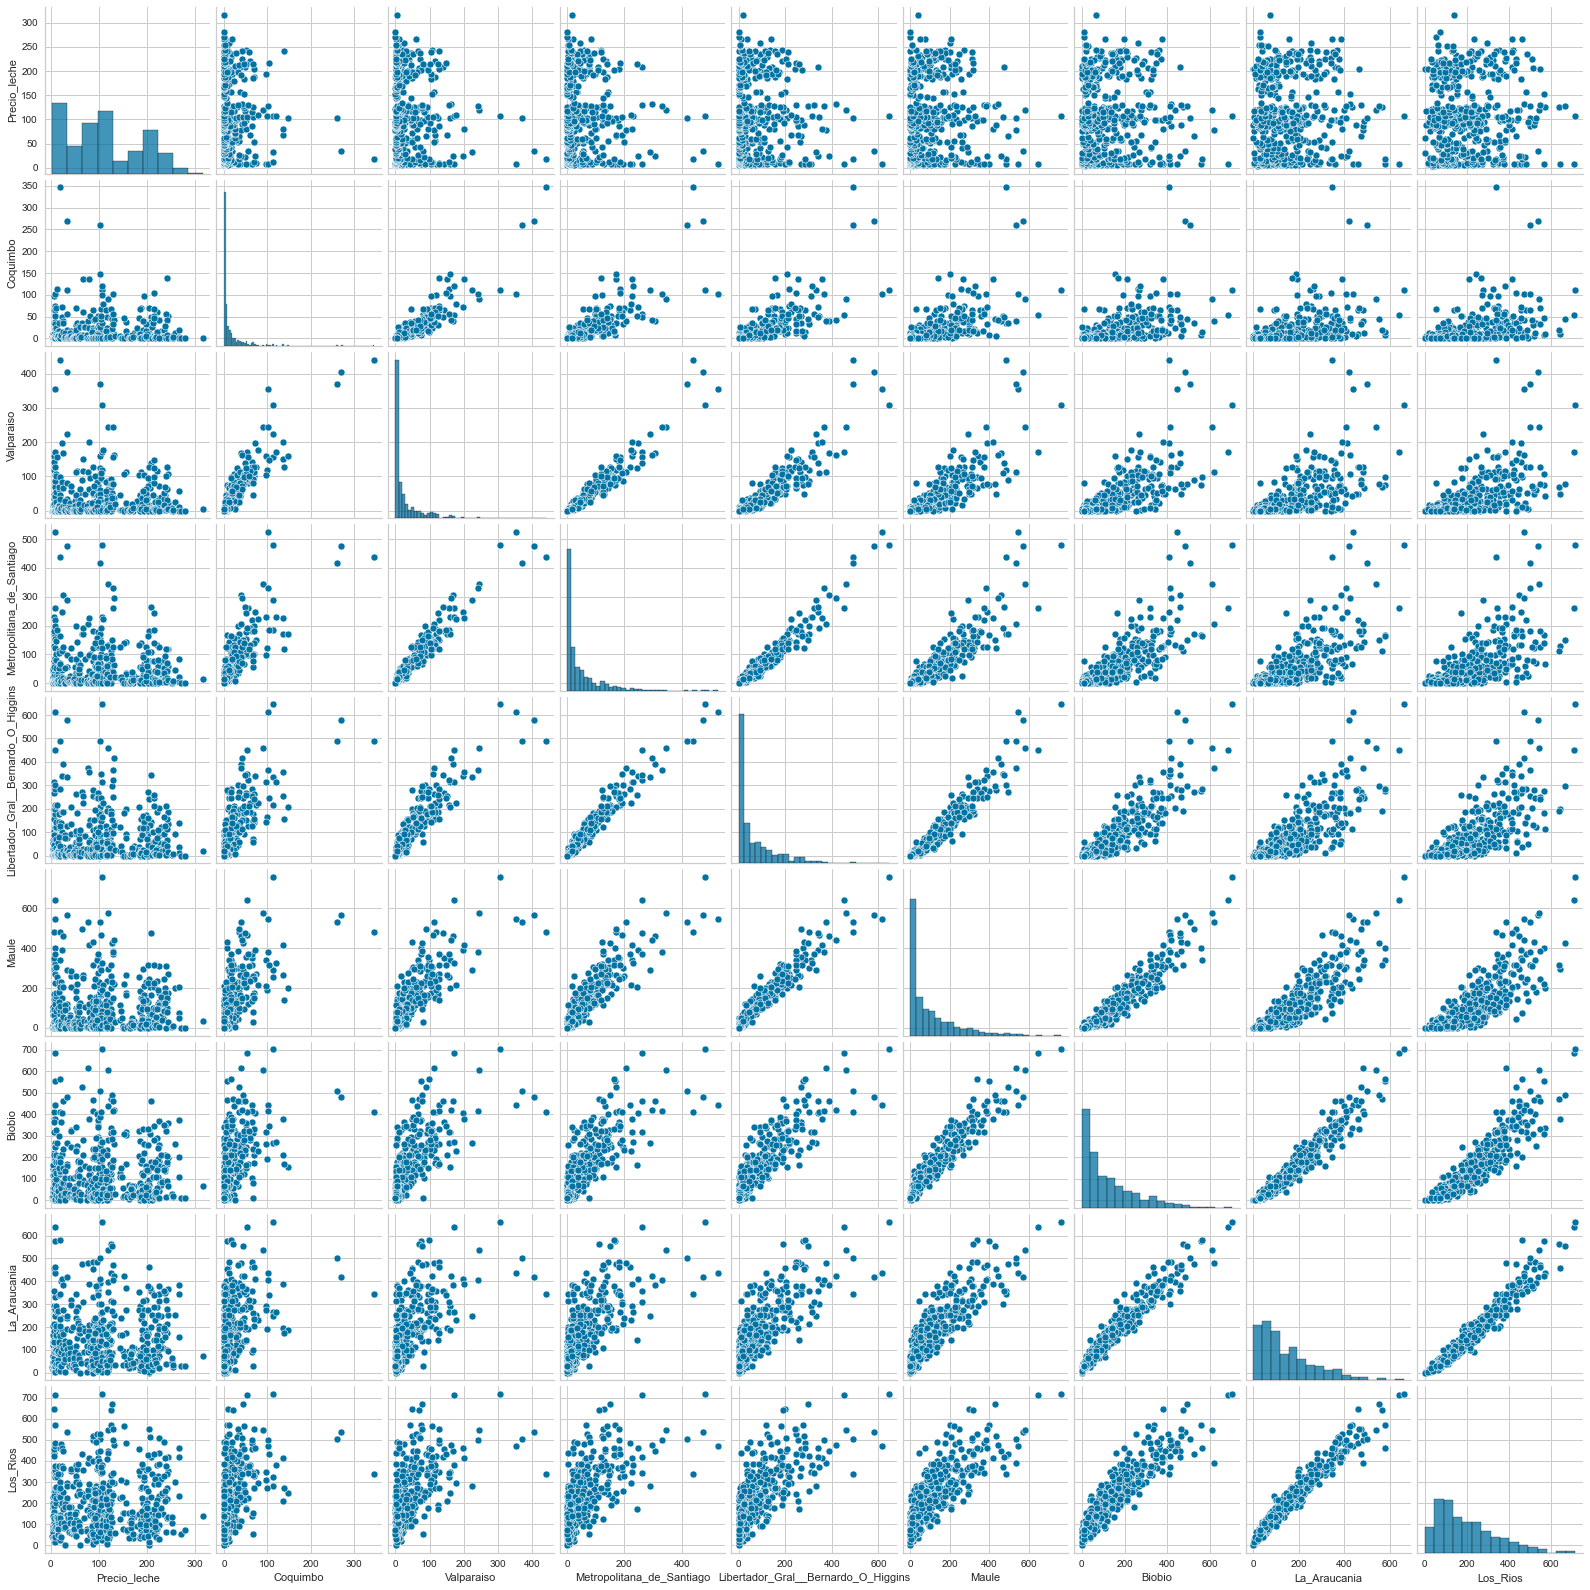

In [2283]:
sns.pairplot(leche_precip);

"Los Lagos"(no se encuentra en el dataset provisto) y "Los Ríos" son las regiones donde más leche se produce: https://portalechero.com/chile-fedeleche-resultados-produccion-de-leche-por-region-en-2020/

Voy a quedarme solamente con la variable "Los Ríos" para simplificar el análisis.

In [2284]:
np.corrcoef(leche_lluvia["Los_Rios"].shift(1).fillna(0), leche_lluvia["Precio_leche"])

array([[ 1.        , -0.01115069],
       [-0.01115069,  1.        ]])

In [2285]:
leche_lluvia["Los_Rios"].shift(1)

date
1979-01-01           NaN
1979-02-01     45.596447
1979-03-01     34.075039
1979-04-01     66.232248
1979-05-01     73.548127
                 ...    
2019-12-01    133.271809
2020-01-01     62.170090
2020-02-01     63.389625
2020-03-01     55.838889
2020-04-01     73.640866
Name: Los_Rios, Length: 496, dtype: float64

In [2286]:
def find_optimal_lag(df, ind_var, dep_var, max_lags = 12):
    shifts = []
    corr_coef = []
    
    #busco el lag con mayor correlación con el precio de la leche para un mes determinado
    for shift in np.arange(1,max_lags+1):
        temp = np.corrcoef(df[ind_var].shift(shift).fillna(0), df[dep_var])
        shifts.append(shift)
        corr_coef.append(temp[0,1])
    return shifts, corr_coef

In [2287]:
x, y = find_optimal_lag(leche_lluvia, "Los_Rios", "Precio_leche", 24)

En el siguiente gráfico muestra como la correlación aumenta cuando mas períodos de lag apliquemos.

Los picos parecen darse en ciclos de 12 meses.

De todas formas, la correlación sigue siendo baja

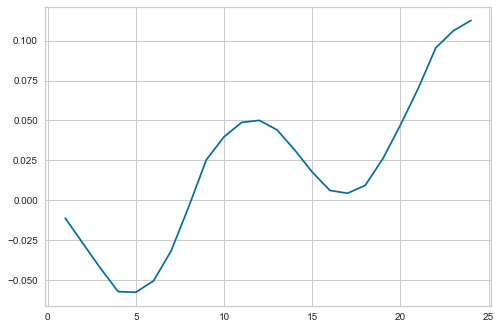

In [2288]:
plt.plot(x, y);

Voy a aplicar un lag de 1 mes, y crear variables adicionales.

In [2289]:
lp_final = leche_lluvia[["Precio_leche", "Los_Rios"]]

In [2290]:
lp_final.loc[:,"lag1_los_rios"] = lp_final["Los_Rios"].shift(1).values

/Users/itsupport/miniconda3/envs/spike/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [2291]:
# Creo variables para capturar las medias de períodos previos
lp_final.loc[:,"rain_prom_previo_trimestre"] = lp_final["lag1_los_rios"].rolling(window=3, min_periods=3).mean().values
lp_final.loc[:,"rain_prom_previo_semestre"] = lp_final["lag1_los_rios"].rolling(window=6, min_periods=6).mean().values
lp_final.loc[:,"rain_prom_previo_anio"] = lp_final["lag1_los_rios"].rolling(window=12, min_periods=12).mean().values

In [2292]:
# Creo variables para capturar la variabilidad de períodos previos
lp_final.loc[:,"rain_std_previo_trimestre"] = lp_final["lag1_los_rios"].rolling(window=3, min_periods=3).std().values
lp_final.loc[:,"rain_std_previo_semestre"] = lp_final["lag1_los_rios"].rolling(window=6, min_periods=6).std().values
lp_final.loc[:,"rain_std_previo_anio"] = lp_final["lag1_los_rios"].rolling(window=12, min_periods=12).std().values

### 4.3.2 Precio Leche vs Datos Banco Central

In [2293]:
leche_central = leche.merge(central, how ="inner", left_index=True, right_index=True)

In [2294]:
leche_central.index.min()

Timestamp('1979-01-01 00:00:00')

In [2295]:
leche_central.index.max()

Timestamp('2020-11-01 00:00:00')

In [2296]:
leche_central.isna().sum()

Precio_leche                                         0
Imacec_empalmado                                   205
Imacec_produccion_de_bienes                        205
Imacec_minero                                      205
Imacec_industria                                   205
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           241
Indice_de_ventas_comercio_real_IVCM                421
Indice_de_ventas_comercio_real_no_durables_IVCM    421
Indice_de_ventas_comercio_real_durables_IVCM       420
Ventas_autos_nuevos                                360
Length: 85, dtype: int64

Ahora sí voy a reducir la dimensionalidad de las de los datos del central, quedandome solo con las varibles que posean como maximo, un 5% de valores nulos.

In [2297]:
nulos_2 = leche_central.isna().sum() / leche_central.shape[0]

In [2298]:
print("Al graficar la distribución de valores nulos de cada variable, vemos que que el {}% de las variables tienen más de un 20% de valores nulos".format(sum(nulos_2 >=.2)))

Al graficar la distribución de valores nulos de cada variable, vemos que que el 77% de las variables tienen más de un 20% de valores nulos


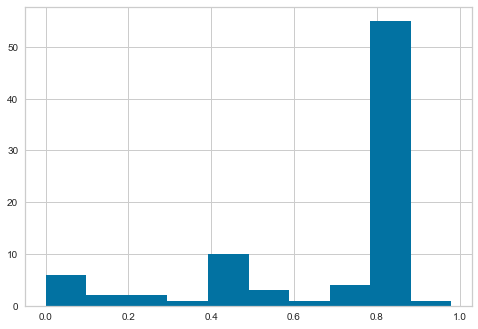

In [2299]:
#Distribución de valores nulos
plt.hist(nulos_2);

In [2300]:
index = nulos_2 <=.05#mascara boolean con las variables que tienen menos del 20% de valores nulos
cols = leche_central.columns[index]#me quedo con los nombres de dichas columnas
leche_central_s = leche_central[cols] # creo el dataset "central_s" que solo contiene las variables que tienen <20% de valores nulos

Esto reduce nuestro segundo dataset a 4 variables independientes con una alta correlación con el precio de la leche.

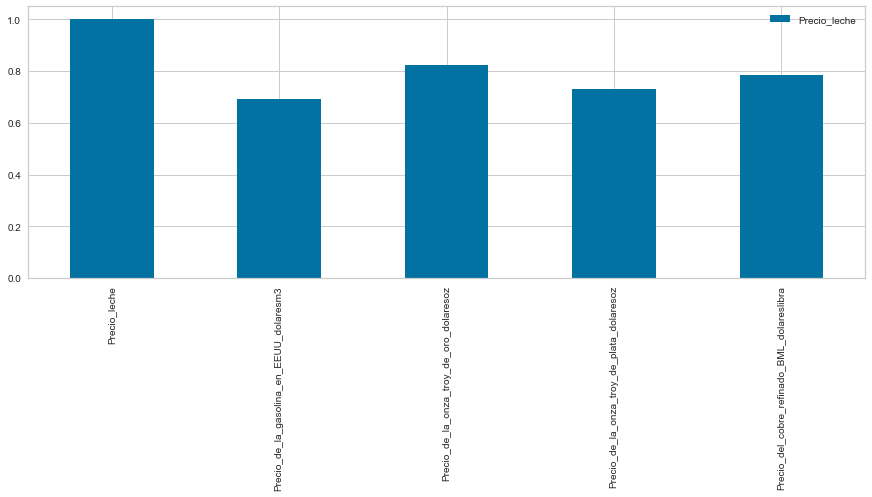

In [2301]:
leche_central_s.corr().iloc[:1,:].T.plot(kind="bar", figsize=(15,5));

Graficamos scatterplots para asegurarnos de que la relación sea lineal y explorar colinearidad entre las variables independientes.

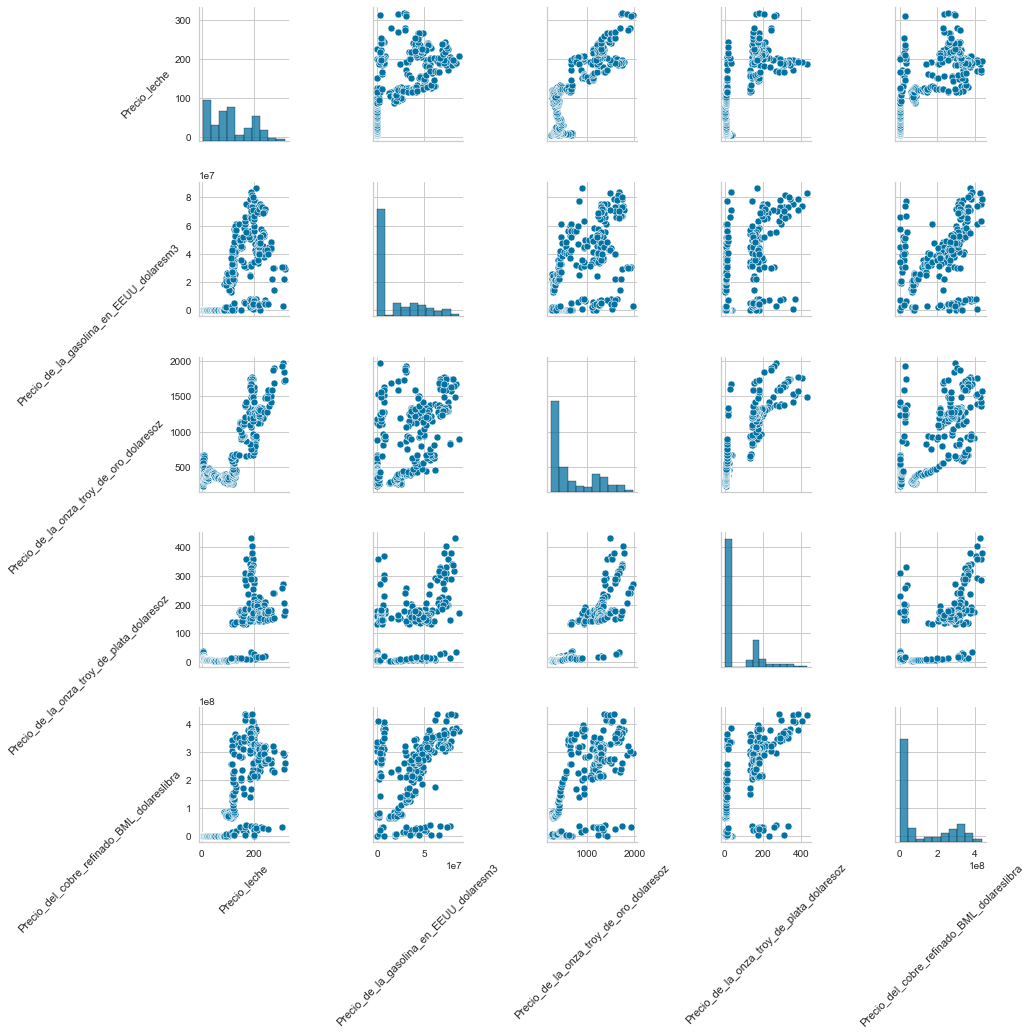

In [2302]:
g = sns.pairplot(leche_central_s);
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

Del gráfico anterior, vemos que la variable "...onza..oro.." es la que tiene una relación lineal visible con la el precio de la leche. 

El problema es que estas variables están disponibles, aparentemten, a mes vencido.

Voy a aplicar un lag o shift de 2 períodos asumiendo que se tarda pocomas de un mes en que las variables macroeconómicas esten disponibles, y que se desea tener el precio estimado de leche para los productores al primer día de cada mes.

In [2303]:
lc_shifted = leche_central_s.copy()

In [2304]:
lc_shifted.iloc[:,1:] = leche_central_s.iloc[:,1:].shift(2)

In [2305]:
lc_shifted.isna().sum()

Precio_leche                                  0
Precio_de_la_gasolina_en_EEUU_dolaresm3       2
Precio_de_la_onza_troy_de_oro_dolaresoz       2
Precio_de_la_onza_troy_de_plata_dolaresoz     2
Precio_del_cobre_refinado_BML_dolareslibra    2
dtype: int64

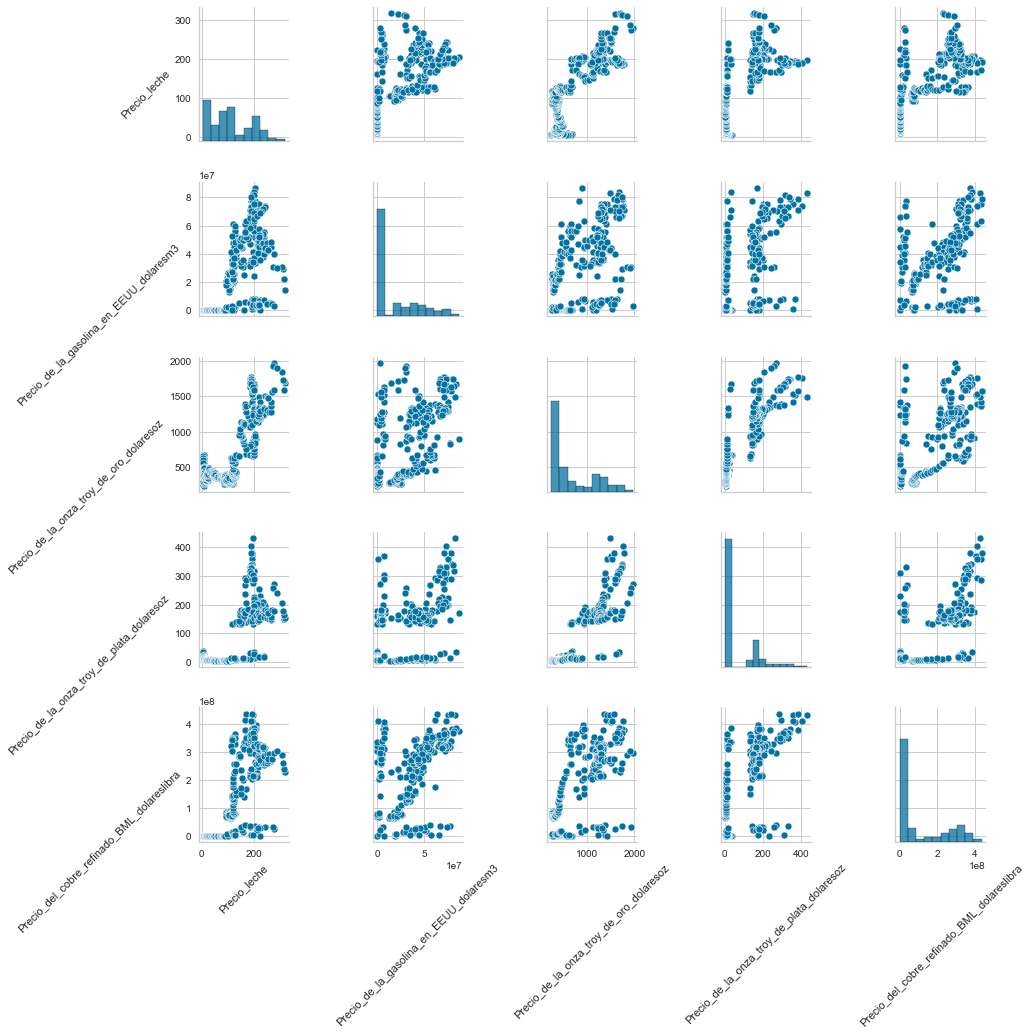

In [2306]:
g = sns.pairplot(lc_shifted);
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

La relación lineal sigue vigente y como vemos en el array debajo, el coeficiente de correlación es virtualmente el mismo.

In [2307]:
lc_shifted.corr()["Precio_de_la_onza_troy_de_oro_dolaresoz"]

Precio_leche                                  0.821626
Precio_de_la_gasolina_en_EEUU_dolaresm3       0.683680
Precio_de_la_onza_troy_de_oro_dolaresoz       1.000000
Precio_de_la_onza_troy_de_plata_dolaresoz     0.908254
Precio_del_cobre_refinado_BML_dolareslibra    0.787610
Name: Precio_de_la_onza_troy_de_oro_dolaresoz, dtype: float64

De este dataset, voy a quedarme solo con las variables "Precio..gasolina.." y "precio..onza..oro.."

In [2308]:
lc_final = lc_shifted[["Precio_leche", "Precio_de_la_onza_troy_de_oro_dolaresoz", "Precio_de_la_gasolina_en_EEUU_dolaresm3"]]

In [2309]:
x1, y1 = find_optimal_lag(lc_final, "Precio_de_la_onza_troy_de_oro_dolaresoz", "Precio_leche", 24)

In [2310]:
x2, y2 = find_optimal_lag(lc_final, "Precio_de_la_gasolina_en_EEUU_dolaresm3", "Precio_leche", 24)

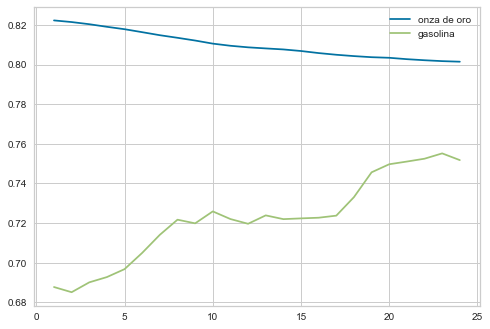

In [2311]:
plt.plot(x1, y1, label="onza de oro");
plt.plot(x2, y2, label="gasolina");
plt.legend();

El precio del oro pierde correlación al aumentar el lago, lo contrario pasa con la gasolina.
En ambos casos voy a quedarme con un lag igual a 1, y crear variables de estadística central y dispersión.

In [2312]:
lc_final.loc[:,"lag1_oro"] = lc_final["Precio_de_la_onza_troy_de_oro_dolaresoz"].shift(1).values
lc_final.loc[:,"lag1_gas"] = lc_final["Precio_de_la_gasolina_en_EEUU_dolaresm3"].shift(1).values

/Users/itsupport/miniconda3/envs/spike/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [2313]:
# Creo variables para capturar las medias de períodos previos
lc_final.loc[:,"oro_prom_previo_trimestre"] = lc_final["lag1_oro"].rolling(window=3, min_periods=3).mean().values
lc_final.loc[:,"oro_prom_previo_semestre"] = lc_final["lag1_oro"].rolling(window=6, min_periods=6).mean().values
# Creo variables para capturar la variabilidad de períodos previos
lc_final.loc[:,"oro_std_previo_trimestre"] = lc_final["lag1_oro"].rolling(window=3, min_periods=3).std().values
lc_final.loc[:,"oro_std_previo_semestre"] = lc_final["lag1_oro"].rolling(window=6, min_periods=6).std().values

In [2314]:
# Creo variables para capturar las medias de períodos previos
lc_final.loc[:,"gas_prom_previo_trimestre"] = lc_final["lag1_gas"].rolling(window=3, min_periods=3).mean().values
lc_final.loc[:,"gas_prom_previo_semestre"] = lc_final["lag1_gas"].rolling(window=6, min_periods=6).mean().values
# Creo variables para capturar la variabilidad de períodos previos
lc_final.loc[:,"gas_std_previo_trimestre"] = lc_final["lag1_gas"].rolling(window=3, min_periods=3).std().values
lc_final.loc[:,"gas_std_previo_semestre"] = lc_final["lag1_gas"].rolling(window=6, min_periods=6).std().values

Soy conciente de que muchas de estas variables introducen colinearidad, pero estoy haciendolo rápido.

In [2315]:
lc_final.drop("Precio_leche", axis=1, inplace=True)

In [2316]:
ml_dataset = lp_final.merge(lc_final, how="inner", left_index=True, right_index=True).fillna(0)

## Modelo

### Modelo baseline

Como modelo baseline voy a usar una regresión lineal.
No voy a dividir en train/test para usar este modelo ya que la regresión es determinista.

Con más tiempo me ocuparía de realizar un tratamiento adecuado de las variables (i.e manejar outliers y tener en cuenta que la regresión asumo que las variables tienen distribuciones normales).

Voy a quedarme con datos de 2018 en adelante.
El motivo es yendo mas atras en el tiempo, introduciriamos mas ruido.
 * El mundo globalizado de la actualidad es muy distinto al de hace 20 años, y así también es distinta la interacción de las distintas variables macroeconómicas.
 * En el analisis de las precipitaciones, quedó en evidencia como las precipitaciones de hace 20 años, no son las mismas que las de la actualidad (el volumne de precipitaciones fue bajando con el pasar del tiempo).

In [2317]:
ml_dataset = ml_dataset.loc["2018-01-01":,:]

In [2318]:
#Modelo de regresión
X = ml_dataset.drop("Precio_leche", axis=1)
X_reg = sm.add_constant(X)
y = ml_dataset["Precio_leche"]
model = sm.OLS(y, X_reg).fit()
model.summary() 

/Users/itsupport/miniconda3/envs/spike/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Precio_leche   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     16.64
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           0.000440
Time:                        23:40:53   Log-Likelihood:                -72.475
No. Observations:                  28   AIC:                             187.0
Df Residuals:                       7   BIC:                             214.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -105.9921    141.082     -0.751      0.477    -439.598     227.614
Los_Rios                                    0.0304      0.042      0.725      0.492      -0.069       0.130
lag1_los_rios                              -0.0173      0.046     -0.374      0.719      -0.127       0.092
rain_prom_previo_trimestre                  0.1379      0.091      1.523      0.171      -0.076       0.352
rain_prom_previo_semestre                  -0.2846      0.122     -2.326      0.053      -0.574       0.005
rain_prom_previo_anio                       0.5241      0.304      1.724      0.128      -0.195       1.243
rain_std_previo_trimestre                  -0.0835      0.060     -1.396      0.205      -0.225       0.058
rain_std_previo_semestre                    0.2000      0.160      1.249      0.252      -0.179       0.579
rain_std_previo_anio                       -1.0061      0.460     -2.188      0.065      -2.094       0.081
Precio_de_la_onza_troy_de_oro_dolaresoz    -0.1073      0.091     -1.180      0.277      -0.322       0.108
Precio_de_la_gasolina_en_EEUU_dolaresm3 -2.838e-07   1.21e-07     -2.344      0.052    -5.7e-07    2.49e-09
lag1_oro                                    0.1447      0.179      0.811      0.444      -0.277       0.567
lag1_gas                                 6.369e-08   1.69e-07      0.377      0.717   -3.36e-07    4.63e-07
oro_prom_previo_trimestre                  -0.1599      0.240     -0.667      0.526      -0.727       0.407
oro_prom_previo_semestre                    0.4388      0.241      1.824      0.111      -0.130       1.007
oro_std_previo_trimestre                    0.0415      0.174      0.238      0.819      -0.371       0.454
oro_std_previo_semestre                     0.2767      0.234      1.184      0.275      -0.276       0.830
gas_prom_previo_trimestre               -7.005e-07    6.3e-07     -1.112      0.303   -2.19e-06    7.89e-07
gas_prom_previo_semestre                -3.864e-07   8.24e-07     -0.469      0.653   -2.34e-06    1.56e-06
gas_std_previo_trimestre                -3.863e-07    7.2e-07     -0.537      0.608   -2.09e-06    1.32e-06
gas_std_previo_semestre                  9.043e-07   1.04e-06      0.868      0.414   -1.56e-06    3.37e-06
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   2.802
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.478
Skew:                           0.149   Prob(JB):                        0.787
Kurtosis:                       2.434   Cond. No.                     9.55e+09
==============================================================================

Notes:
[1] Stand

Los coeficientes son muy pequeños porque las magnitudes de variables variables están en ordenes de magnitud de cientos de millones (que ya aclaré antes que están mal)

In [2319]:
from statsmodels.tools.eval_measures import mse

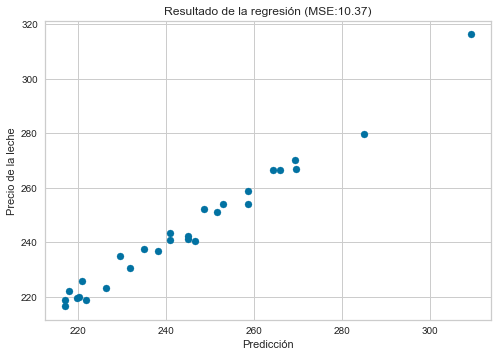

In [2320]:
y_hat = model.predict(X_reg)
plt.scatter(y_hat, y);
plt.xlabel("Predicción");
plt.ylabel("Precio de la leche");
plt.title("Resultado de la regresión (MSE:{})".format(np.round(mse(y, y_hat, axis=0),2)));

### Random Forest

In [2321]:
from sklearn.model_selection import GridSearchCV

In [2322]:
from sklearn.ensemble import RandomForestRegressor

In [2323]:
seed = 1501 #seed forall random processe

In [2324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=seed)

In [2325]:
rf = RandomForestRegressor(random_state=seed, n_estimators = 250)

In [2326]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=1501)

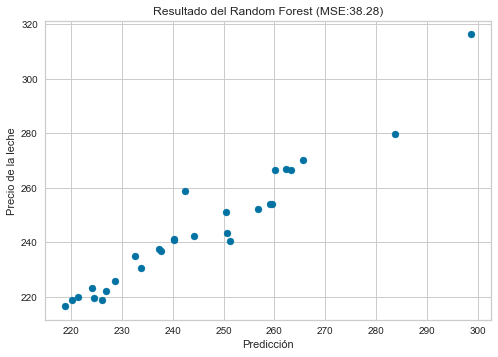

In [2327]:
y_hat2 = rf.predict(X)
plt.scatter(y_hat2, y);
plt.xlabel("Predicción");
plt.ylabel("Precio de la leche");
plt.title("Resultado del Random Forest (MSE:{})".format(np.round(mse(y, y_hat2, axis=0),2)));

### RF con Cross Validation

Esta part es solo a modo de ejemplo de como usaría CV con un modelo.

In [2328]:
# los valores de la grilla fueron elegidos en base a los resultados de las curvas de validación
grid_forest  ={
    "max_depth": [7, 9, 11, 13, None],
    "n_estimators": [450, 700, 850],
    "random_state":[seed]
}

In [2329]:
rf_cv = GridSearchCV(rf, grid_forest, scoring="neg_mean_squared_error",cv = 5)

In [2330]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250,
                                             random_state=1501),
             param_grid={'max_depth': [7, 9, 11, 13, None],
                         'n_estimators': [450, 700, 850],
                         'random_state': [1501]},
             scoring='neg_mean_squared_error')

In [2331]:
rf_cv.best_params_

{'max_depth': 7, 'n_estimators': 450, 'random_state': 1501}

In [2332]:
rf_best = RandomForestRegressor(max_depth=7, n_estimators=450, random_state=1501)

In [2333]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=450, random_state=1501)

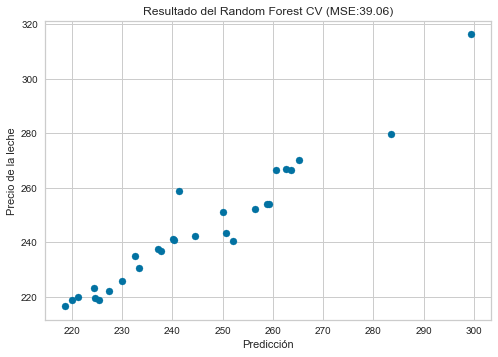

In [2334]:
y_hat3 = rf_best.predict(X)
plt.scatter(y_hat3, y);
plt.xlabel("Predicción");
plt.ylabel("Precio de la leche");
plt.title("Resultado del Random Forest CV (MSE:{})".format(np.round(mse(y, y_hat3, axis=0),2)));

### Conclusiones

* El mejor modelo resultó ser el de la regresión lineal
* El objetivo principal de este modelo es predicir el precio de la leche, y por o tanto puede ser usado para definir un precio justo antes de de que se publique, comprar comodities si se que la leche va a aumentar, etc.
* Al ser interpretable, podría también ser utilizar para aplicar políticas públicas, i.e decidir si se beneficia la expotación o no en base al precio
* El análisis exploratorio de las precipitaciones puede usarse para entender el impacto del cambio climático.